# Import libraries

In [ ]:
import matplotlib.pyplot as plt # for data visualisation
import numpy as np              # for mathematical calculations
import tensorflow as tf         # for network creation

from tensorflow import keras    # API for tf
from tensorflow.keras.datasets import mnist  # dataset
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D  # layers for neural network

# Getting data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255   # data about pixel colour is in range [1, 255], but we need [0, 1] for our neural network
x_train1, x_test1 = x_train, x_test
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)  # data standartisation 

# Create model

In [ ]:
# config layers by keras API
model = keras.Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),     # hidden layer
    Dense(10, activation='softmax')    # output layer
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# compiling model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model
model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 25s 7ms/step - loss: 0.1502 - accuracy: 0.9539 - val_loss: 0.0608 - val_accuracy: 0.9834
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0467 - val_accuracy: 0.9863
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0456 - val_accuracy: 0.9869
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 0.0535 - val_accuracy: 0.9851
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0451 - val_accuracy: 0.9896
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0110 - accuracy: 0.9962 - val_loss: 0.0485 - val_ac

Now model is trained. Let's see accuracy in tests.

In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9908


[0.03682900592684746, 0.9908000230789185]

Accuracy is around 98% and this is good result. Let's try to predict next number.

[[4.0263640e-16 1.1318438e-15 2.8685973e-12 6.8205104e-13 9.1107297e-24
  4.0136780e-18 8.9934255e-25 1.0000000e+00 9.9346779e-16 2.9139736e-14]]
Predict digit: 7


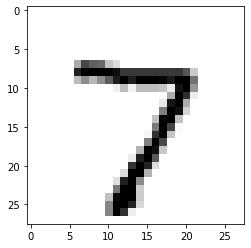

In [ ]:
n=0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'Predict digit: {np.argmax(res)}')
plt.imshow(x_test1[n], cmap=plt.cm.binary)

Model is make error in tests. Now we can see some of them.

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

mask = pred != y_test
x_false = x_test1[mask]
y_false = pred[mask]

print(x_false.shape)

(92, 28, 28)


Network value:7


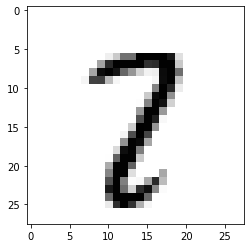

Network value:2


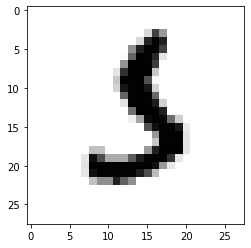

Network value:1


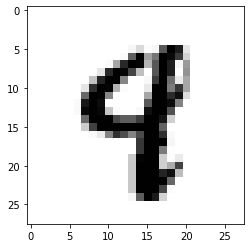

Network value:0


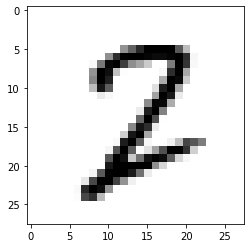

Network value:4


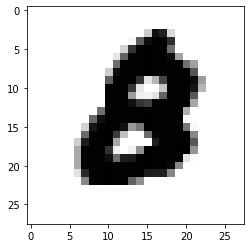

Network value:1


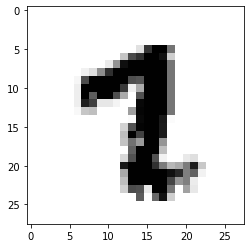

Network value:4


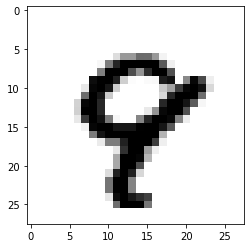

Network value:9


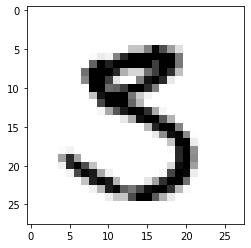

Network value:5


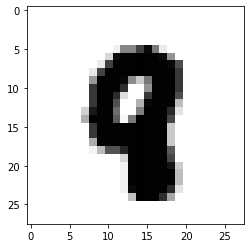

Network value:9


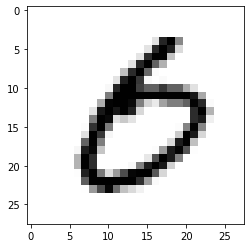

In [ ]:
# 10 wrong result and original picture
for i in range(10):
  print('Network value:'+str(pred[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()